In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [2]:
def plot_2d_separator(classifier, X, fill=False, ax=None, alpha=1, threshold=None, linestyle="solid", extend=None):
    cm = ListedColormap(['#0000aa', '#ff2020'])
    eps = X.std() / 2.

    if extend is None:
        extend = lambda x: x
    
    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(extend(X_grid))
        levels = [0] if threshold is None else [threshold]
        fill_levels = [decision_values.min()] + levels + [
            decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5] if threshold is None else [threshold]
        fill_levels = [0] + levels + [1]
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, alpha=alpha, cmap=cm)
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black", alpha=alpha,
                   linestyles=linestyle, zorder=5)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    
def plot(classifier, X_train, X_test, y_test, ax, **kwargs):
    plot_2d_separator(classifier, X_train, ax=ax, fill=True, alpha=.3, **kwargs)
    colors = {0: 'red', 1: 'blue'}

    df = pd.DataFrame({'x': X_test[:,0], 'y': X_test[:,1], 'label':y_test})
    groups = df.groupby('label')
    for label, group in groups:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=label, color=colors[label])

# Exercise 1

In [3]:
X, y = make_moons(n_samples=10000, noise=0.1, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

[5, 5] 0.1 [1250    0    3 1247]
[5, 5] 0.01 [1250    0    4 1246]
[5, 5] 0.001 [1250    0    3 1247]
[10, 10] 0.1 [1090  160   99 1151]
[10, 10] 0.01 [1090  160   99 1151]
[10, 10] 0.001 [1236   14    9 1241]
[20, 20] 0.1 [1250    0    3 1247]
[20, 20] 0.01 [1250    0    3 1247]
[20, 20] 0.001 [1250    0    4 1246]
[10, 10, 10] 0.1 [1250    0    3 1247]
[10, 10, 10] 0.01 [1250    0    4 1246]
[10, 10, 10] 0.001 [1250    0    2 1248]
[15, 5, 5] 0.1 [1250    0    2 1248]
[15, 5, 5] 0.01 [1250    0    4 1246]
[15, 5, 5] 0.001 [1250    0    3 1247]
[20, 10, 5] 0.1 [1250    0    4 1246]
[20, 10, 5] 0.01 [1250    0    4 1246]
[20, 10, 5] 0.001 [1250    0    4 1246]


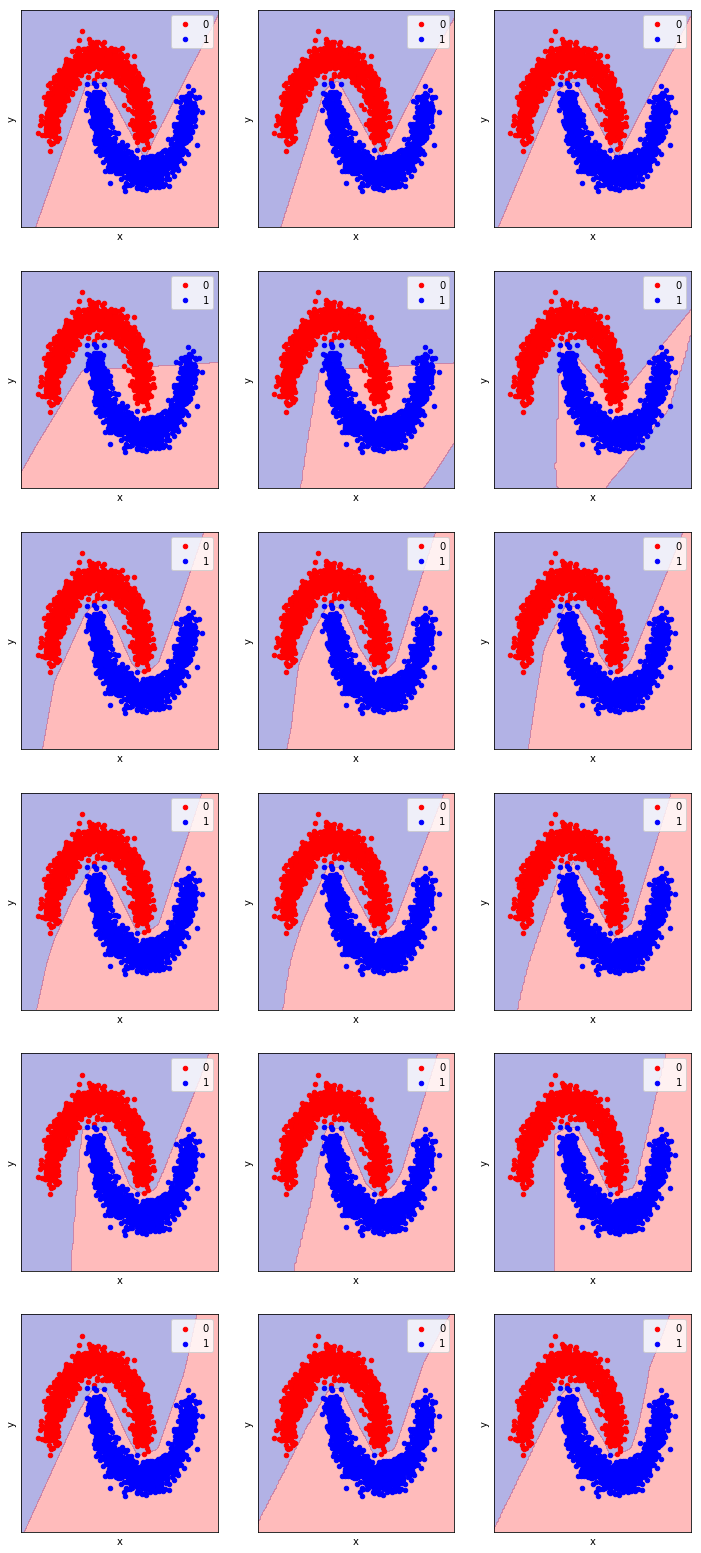

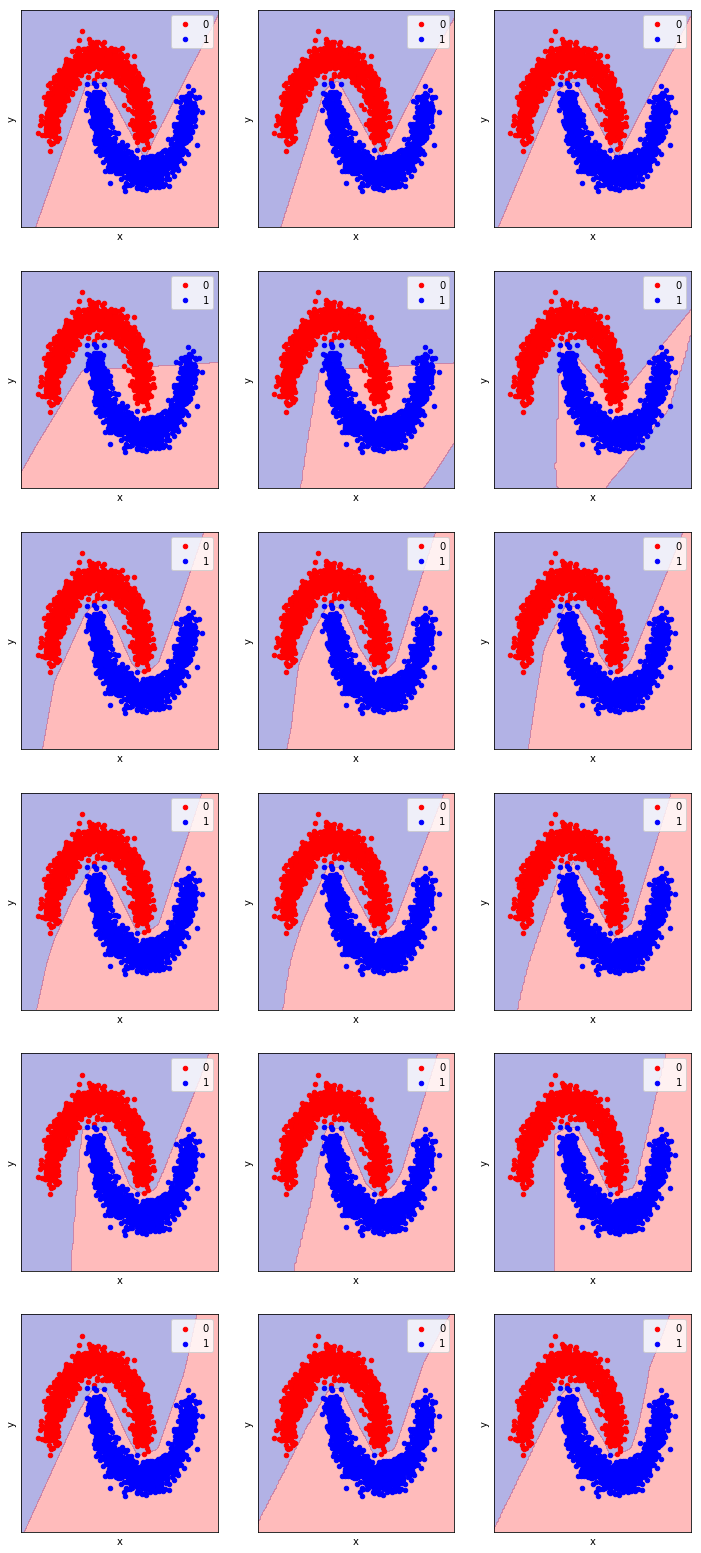

In [4]:
hidden_layer_sizess = [
    [5, 5],
    [10, 10],
    [20, 20],

    [10, 10, 10],
    [15, 5, 5],
    [20, 10, 5]
]

alphas = [0.1, 0.01, 0.001]

fig, ax = plt.subplots(nrows=len(hidden_layer_sizess), ncols=len(alphas), figsize=(12, 28))

for i, hidden_layer_sizes in enumerate(hidden_layer_sizess):
    for j, alpha in enumerate(alphas):
        nn = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=hidden_layer_sizes, alpha=alpha)
        nn.fit(X_train, y_train);
        print(hidden_layer_sizes, alpha, confusion_matrix(y_test, nn.predict(X_test)).ravel())
        plot(nn, X_train, X_test, y_test, ax[i][j])

fig.savefig('1A.png')
fig

[1077  173  174 1076]
[1086  164  141 1109]
[1085  165  141 1109]
[1142  108   86 1164]
[1247    3    5 1245]
[1250    0    1 1249]


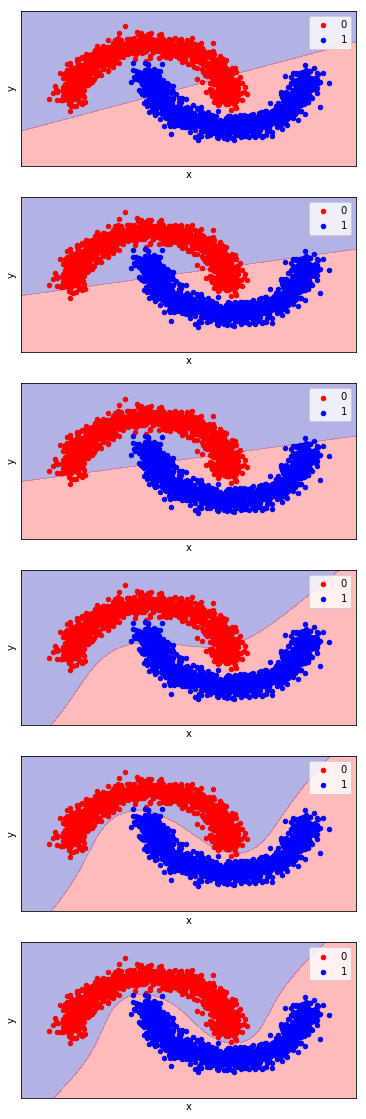

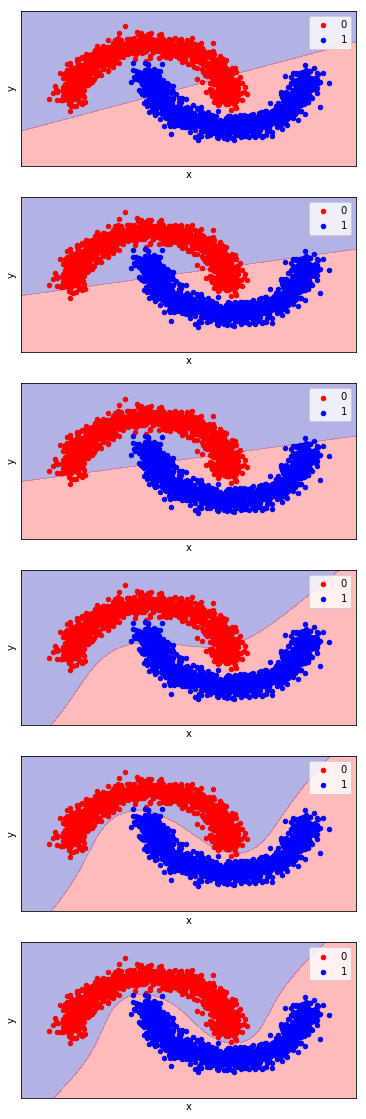

In [5]:
not_extend = lambda x: x
extend = lambda x: [[X[0], X[1], X[0]**2, X[1]**2, X[0]**3, X[1]**3] for X in x]

options = [
    (not_extend, 0.01),
    (not_extend, 1.0),
    (not_extend, 100.0),
    (extend, 0.01),
    (extend, 1.0),
    (extend, 100.0)
]

fig, ax = plt.subplots(nrows=len(options), figsize=(6,20))

for i, (extend, C) in enumerate(options):
    lr = LogisticRegression(C=C, random_state=0)
    lr.fit(extend(X_train), y_train)

    print(confusion_matrix(y_test, lr.predict(extend(X_test))).ravel())

    plot(lr, X_train, X_test, y_test, ax[i], extend=extend)

fig.savefig('1B.png')
fig

2 [1210   40  185 1065]
4 [1210   40  185 1065]
6 [1243    7    5 1245]
8 [1246    4    5 1245]


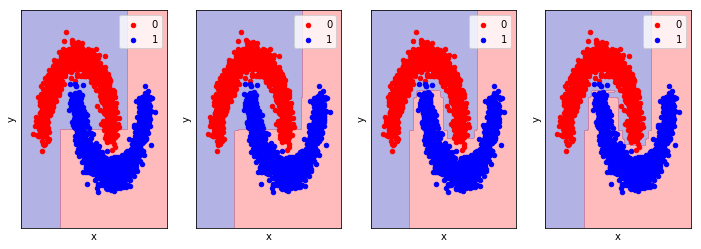

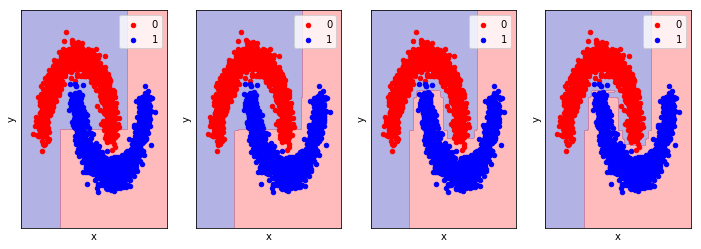

In [6]:
depths = [2, 4, 6, 8]
fig, ax = plt.subplots(ncols=len(depths), figsize=(12, 4))

for i, depth in enumerate(depths):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=0)
    dt.fit(X_train, y_train)

    print(depth, confusion_matrix(y_test, dt.predict(X_test)).ravel())
    plot(dt, X_train, X_test, y_test, ax[i])
    
fig.savefig('1B_decision_trees.png')
fig

1 2 [1188   62  206 1044]
1 5 [1201   49  186 1064]
1 10 [1247    3    6 1244]
3 2 [1168   82  188 1062]
3 5 [1211   39   11 1239]
3 10 [1247    3    3 1247]
5 2 [1181   69  185 1065]
5 5 [1239   11   13 1237]
5 10 [1248    2    4 1246]
10 2 [1181   69  160 1090]
10 5 [1240   10    9 1241]
10 10 [1248    2    4 1246]
20 2 [1076  174   48 1202]
20 5 [1239   11    8 1242]
20 10 [1248    2    4 1246]


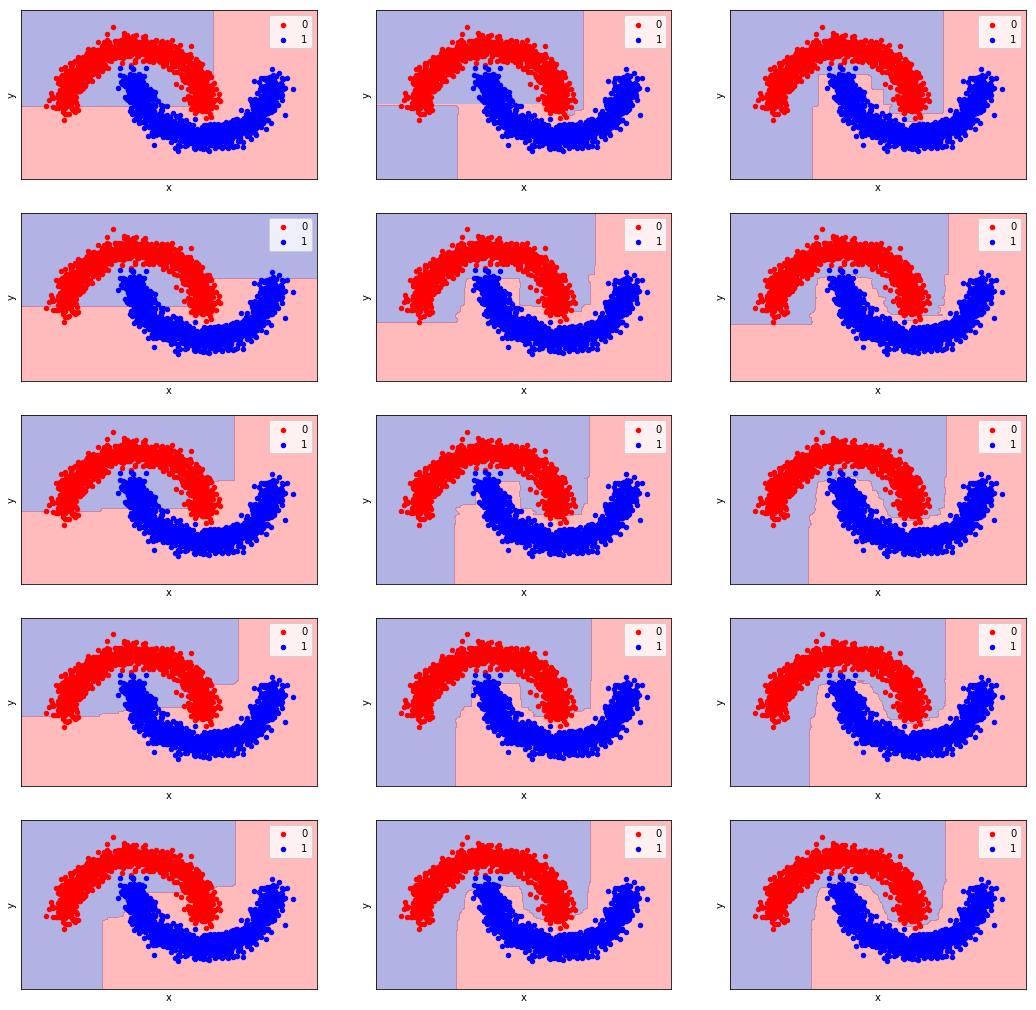

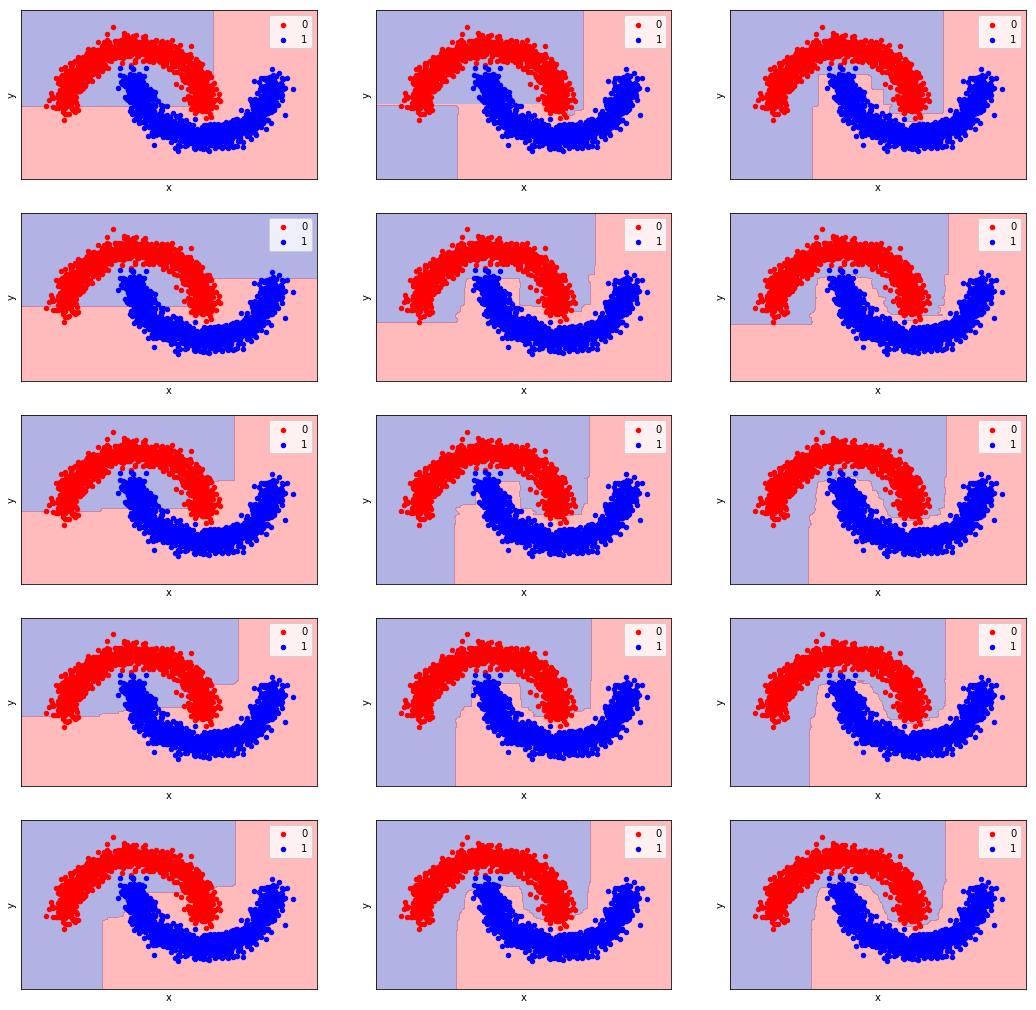

In [7]:
estimatorss = [1, 3, 5, 10, 20]
max_depths = [2, 5, 10]
fig, ax = plt.subplots(ncols=len(max_depths), nrows=len(estimatorss), figsize=(18,18))

for i, estimators in enumerate(estimatorss):
    for j, max_depth in enumerate(max_depths):
        rf = RandomForestClassifier(n_estimators=estimators, random_state=0, max_depth=max_depth)
        rf.fit(X_train, y_train)

        print(estimators, max_depth, confusion_matrix(y_test, rf.predict(X_test)).ravel())
        plot(rf, X_train, X_test, y_test, ax[i][j])

fig.savefig('1B_random_forests.png')
fig

linear 3 0.0 auto [1085  165  145 1105]
poly 3 1.0 auto [1249    1    2 1248]
poly 5 1.0 auto [1250    0    2 1248]
rbf 3 0.0 0.1 [1198   52   44 1206]
rbf 3 0.0 1.0 [1249    1    3 1247]
rbf 3 0.0 3.0 [1249    1    3 1247]


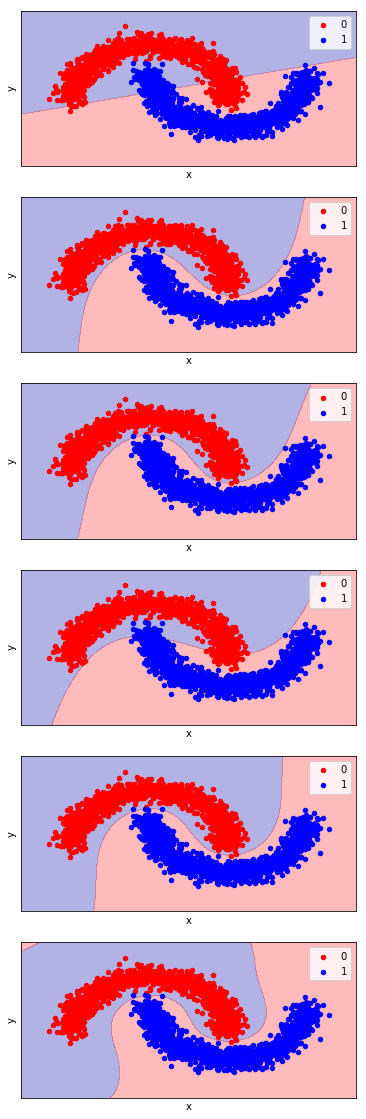

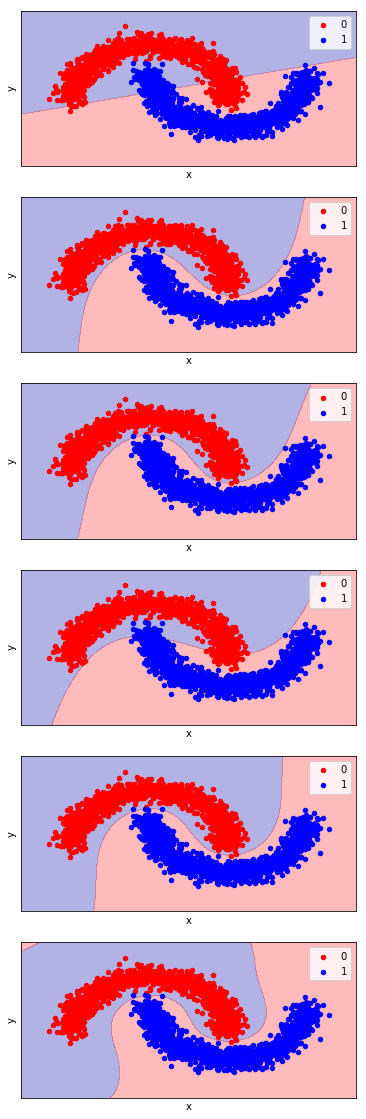

In [8]:
# kernel, degree, coef0, gamma
parameters = [
    ('linear', 3, 0.0, 'auto'),
    ('poly', 3, 1.0, 'auto'),
    ('poly', 5, 1.0, 'auto'),
    ('rbf', 3, 0.0, 0.1),
    ('rbf', 3, 0.0, 1.0),
    ('rbf', 3, 0.0, 3.0)
]

fig, ax = plt.subplots(nrows=len(parameters), figsize=(6,20))

for i, (kernel, degree, coef0, gamma) in enumerate(parameters):
    svc = SVC(kernel=kernel, degree=degree, coef0=coef0, gamma=gamma, random_state=0)
    svc.fit(X_train, y_train)
    print(kernel, degree, coef0, gamma, confusion_matrix(y_test, svc.predict(X_test)).ravel())
    plot(svc, X_train, X_test, y_test, ax[i])

fig.savefig('1B_svcs.png')
fig

# Exercise 2

In [9]:
titanic = pd.read_csv('../data/titanic_800.csv')

X = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X['Sex'].replace({'male': 1, 'female': 0}, inplace=True)
X['Age'].replace({None: 0}, inplace=True)
X['Embarked'].replace({None: 0, 'C': 1, 'Q': 2, 'S': 3}, inplace=True)
X = X.values

y = titanic['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size=0.25, train_size=0.75)

FileNotFoundError: File b'../data/titanic_800.csv' does not exist

In [ ]:
hidden_layer_sizess = [
    [5, 5],
    [10, 5],
    [10, 10],
    [20, 20],
    [100, 100],
    
    [5, 5, 5],
    [10, 10, 10],
    [15, 5, 5],
    [20, 10, 5]
]

alphas = [0.1, 0.01, 0.001]

for i, hidden_layer_sizes in enumerate(hidden_layer_sizess):
    for j, alpha in enumerate(alphas):
        nn = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=hidden_layer_sizes, alpha=alpha)
        nn.fit(X_train, y_train);
        print(hidden_layer_sizes, alpha, confusion_matrix(y_test, nn.predict(X_test)).ravel())

In [ ]:
not_extend = lambda x: x

extend_record = lambda x: [v**p for v in x for p in range(1,4)]
extend = lambda x: [extend_record(r) for r in x]

options = [
    (not_extend, 0.01),
    (not_extend, 1.0),
    (not_extend, 100.0),
    (extend, 0.01),
    (extend, 1.0),
    (extend, 100.0)
]

for i, (extend, C) in enumerate(options):
    lr = LogisticRegression(C=C, random_state=0)
    lr.fit(extend(X_train), y_train)

    print(C, confusion_matrix(y_test, lr.predict(extend(X_test))).ravel())

In [ ]:
depths = [2, 4, 6, 8, 10]

for i, depth in enumerate(depths):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=0)
    dt.fit(X_train, y_train)

    print(depth, confusion_matrix(y_test, dt.predict(X_test)).ravel())

In [ ]:
estimatorss = [1, 3, 5, 10, 20]
max_depths = [2, 5, 10]

for i, estimators in enumerate(estimatorss):
    for j, max_depth in enumerate(max_depths):
        rf = RandomForestClassifier(n_estimators=estimators, random_state=0, max_depth=max_depth)
        rf.fit(X_train, y_train)

        print(estimators, max_depth, confusion_matrix(y_test, rf.predict(X_test)).ravel())

In [ ]:
# kernel, degree, coef0, gamma
parameters = [
#     ('linear', 3, 0.0, 'auto'),
#     ('poly', 3, 0.0, 'auto'),
#     ('poly', 3, 1.0, 'auto'),
    ('poly', 5, 0.0, 'auto'),
    ('poly', 5, 1.0, 'auto'),
    ('rbf', 3, 0.0, 'auto'),
    ('rbf', 3, 0.0, 0.1),
    ('rbf', 3, 0.0, 1.0),
    ('rbf', 3, 0.0, 10.0)
]

for i, (kernel, degree, coef0, gamma) in enumerate(parameters):
    svc = SVC(kernel=kernel, degree=degree, coef0=coef0, gamma=gamma, random_state=0)
    svc.fit(X_train, y_train)
    
    print(kernel, degree, coef0, gamma, confusion_matrix(y_test, svc.predict(X_test)).ravel())